ObjectDetection:
Mit Watershed Algorithmus oder grabcut
Alternative Idee für die Regionen, wenn wir die Konturen schon haben einfach schauen, wo diese sich sehr nahe kommen /ber

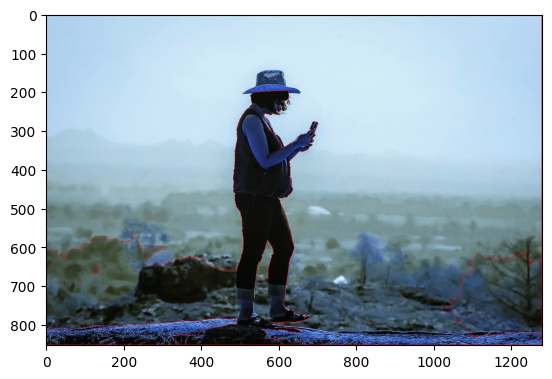

In [13]:

#https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = 'pictures/woman.jpg'

# Read the input image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

 # Apply thresholding to create a binary image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

 # Add one to all labels so that sure background is not 0 but 1
markers = markers + 1

 # Mark the region of unknown with 0
markers[unknown == 255] = 0

# Apply watershed algorithm
cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Mark segmented regions in red

plt.imshow(image)

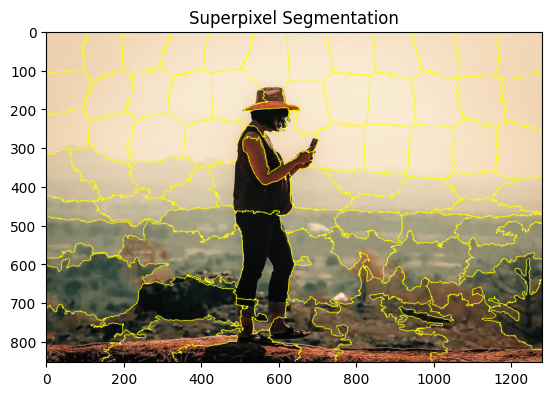

In [43]:
import cv2
import numpy as np
from skimage.segmentation import slic, mark_boundaries
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('pictures/woman.jpg')

# Convert the image to RGB (scikit-image slic requires RGB format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform superpixel clustering using SLIC
segments = slic(image_rgb, n_segments=100, compactness=5)

# Create a mask that indicates the boundaries of the segments
segmentation_mask = mark_boundaries(image_rgb, segments)

# Display the original image and the segmented image with boundaries
plt.imshow(segmentation_mask)
plt.title('Superpixel Segmentation')

plt.show()


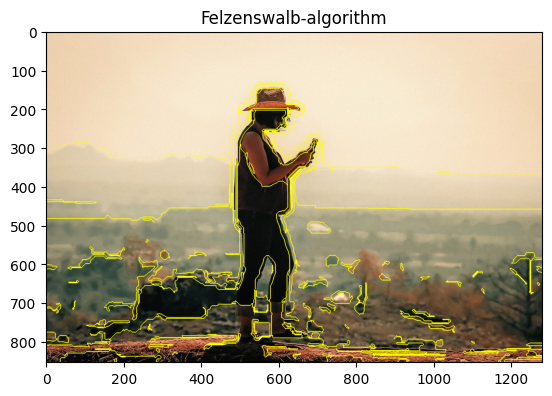

In [49]:
from matplotlib import pyplot as plt
import numpy as np
import skimage.segmentation as sk
from skimage.io import imread
from PIL import Image

image = imread('pictures/woman.jpg')
segments = sk.felzenszwalb(image,scale=150,sigma=5,min_size=20)
image = sk.mark_boundaries(image,segments)

plt.title('Felzenswalb-algorithm')
plt.imshow(image)

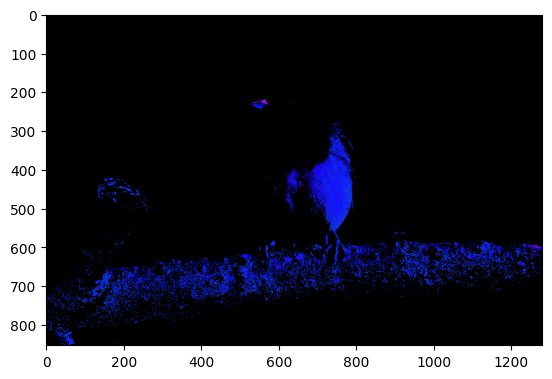

In [48]:
#https://realpython.com/python-opencv-color-spaces/
from matplotlib import pyplot as plt
import cv2

white = (0, 0, 200)
dark_white = (145, 60, 255)

image = cv2.imread('pictures/dark-eyed-junco.jpg')
hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsvImage,white,dark_white)
result = cv2.bitwise_and(hsvImage,hsvImage,mask=mask)
plt.imshow(result)



image 1/1 c:\Users\john\studium\Medienverarbeitung\LineArt\project-line-art\dokumentary\pictures\woman.jpg: 448x640 1 person, 2 cell phones, 1658.1ms
Speed: 2.0ms preprocess, 1658.1ms inference, 5.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\segment\predict131
1 label saved to runs\segment\predict131\labels


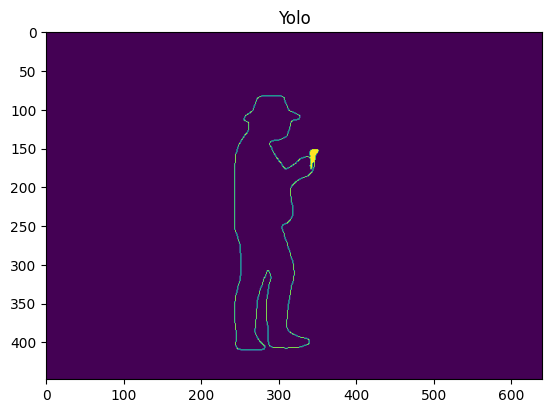

In [59]:
from ultralytics import YOLO
import numpy as np
from  matplotlib import pyplot as plt
import cv2

yolo_model = YOLO(("yolov8x-seg.pt"))

prediction = yolo_model.predict(source='pictures/woman.jpg',save=True,save_txt=True,show_boxes=True)

mask = (prediction[0].masks[0].data.numpy()[0] * 255).astype(np.uint8)
edges = cv2.Canny(mask,50,150)

handy_mask = (prediction[0].masks[1].data.numpy()[0] * 255).astype(np.uint8)
handy_mask2 = (prediction[0].masks[2].data.numpy()[0] * 255).astype(np.uint8)
combined = cv2.bitwise_or(handy_mask,edges)
combined = cv2.bitwise_or(combined,handy_mask2)
plt.title("Yolo")
plt.imshow(mask)
plt.imshow(edges)
plt.imshow(combined)
